 # Title: Unveiling Cinematic Opportunities:

**Navigating Microsoft's Dive into the Film Industry**

# Overview

Exploring the financial success of movie production involves examiningfactors such as profitability,genre,duration,budget, studio, director and actor experience.

  # 1.Business Understanding

**Introduction.**

In a bold move, Microsoft is venturing into the world of original video content creation, inspired by the success stories of major players in the industry. The tech giant aims to establish its own movie studio, poised to make a significant impact. However, the challenge lies in the unfamiliar terrain of film production. In light of this, the task at hand is to delve the current trends and preferences driving success in the film industry. By analyzing box office hits, identifying emerging genres, and understanding audience preferences, the key factors contributing to blockbuster success could be unveiled.


The findings will be the cornerstone for making actionable insights. These insights will not only guide Microsoft's foray into filmmaking but will also empower the head of the new movie studio to make informed decisions on the types of films to produce. The main objective is ensuring the creation of films that resonate with audiences and propel the company into the spotlight of the entertainment industry

**Defining the metric for success.**

Microsoft's new movie studio lacks domain expertise in filmmaking and needs guidance on which film genres to focus on to maximize box office success. Leveraging historical box office data and exploring genre trends, this investigation will guide the choice of films they should produce. Box office revenues, ROI and ratings data will serve as indicators of financial viability and audience reception across different film genres. 
The success of our analysis will be measured by the following metrics:

The analysis should accurately identify the film genres that have historically performed well at the box office.
Revenue increase: 
Try to predict the profitability of a movie based on the features of the dataset. A movie is profitable if it makes more than at least 2 times the budget

**Main objectives**
The main goal is to craft a roadmap for creating films that captivate audiences and thrive financially.

Specific Objectives:

*Genre Mastery for Success:*
Identify genres with the highest potential for revenue and audience acclaim, ensuring future films align with evolving tastes.

*Beyond the Basics:*
Influential Factors:
Explore factors like budget, studio influence, and target audience demographics to understand their impact on a film's success.

*Insights for Cinematic Brilliance:*
Distill actionable recommendations aligning the studio's content strategy with audience preferences and market trends for increased success.

**Experimental Approach**

i.)Collecting Data

ii.)Review and validate the dataset

iii.)Refining the data through cleansing and type casting

iv.)Conducting Exploratory Data Analysis

v.)Modeling and Evaluating Features

vi.)Drawing conclusions based on the evaluation

**Questions To Consider**
1.Is the film industry financially succesful?
 Indeed,it is depicted that more movies generate profit than losses.
 
2.What challenges does a business face inthis project?
 A significant hurdle is the lack of clear direction.
 
3.What factors contribute to a movie's financial success?
 Considerations include genre ,duration,studio, director, actor experience etc

# 2.Data Understanding:

We're leveraging data from Box Office Mojo, IMDb, TMDB Movies, and TN Movie Budgets, focusing on the "movie_basics," "movie_ratings," "movie_gross," and "movie_budgets" tables. Key data points include:

1. **Box Office Performance:**
   - "movie_gross" (Box Office Mojo): Extracting domestic and foreign gross data to understand revenue trends over the years.

2. **Audience Reception:**
   - "movie_ratings" (IMDb): Analyzing vote averages and counts to gauge audience sentiment and film popularity.

3. **Genre and Language:**
   - "movie_basics" (Box Office Mojo) and "tmdb_movies" (TMDB Movies): Exploring genre and original language data for insights into successful film characteristics.

4. **Release Information:**
   - "movie_basics" and "tmdb_movies": Utilizing release dates to identify patterns in successful movie launches.

5. **Production Budgets:**
   - "movie_budgets" (TN Movie Budgets): Understanding the financial aspect with production budget, domestic, and worldwide gross figures.

This comprehensive dataset will provide actionable insights for Microsoft's movie studio, aiding decisions on genre selection, release strategies, and budget planning for a successful foray into the film industry.



# 3. Data Preparation

In [1]:
#Import necessary libraries
# 1. Pandas which is Essential for data manipulation and analysis
import pandas as pd
# 2. Numpy which will be Useful for numerical operations .
import numpy as np
# 3.Matplotlib and Seaborn:For data visualization to gain insights into trends and patterns.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Specify file paths for the CSV files
tmdb_movies_path = 'myData/tmdb.movies.csv'
tn_movie_budgets_path = 'myData/tn.movie_budgets.csv'
bom_movie_gross_path = 'myData/bom.movie_gross.csv'

# Read the CSV files into Pandas DataFrames
tmdb_movies_df = pd.read_csv(tmdb_movies_path)
tn_movie_budgets_df = pd.read_csv(tn_movie_budgets_path, index_col=0)
bom_movie_gross_df = pd.read_csv(bom_movie_gross_path)

**View the first few rows of BOM DataFrame:**

In [4]:
print(bom_movie_gross_df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [5]:
print(bom_movie_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


The dataset contains 3387 entries with information on movies, including titles, studios, domestic and foreign gross earnings, and release years.
Missing values are present in the 'studio,' 'domestic_gross,' and 'foreign_gross' columns, which may require data cleaning

 **1. Addressing Missing Values:**

In [6]:
# a. Identify Missing Values:
bom_movie_gross_df.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
# b. Impute Numerical Data:
bom_movie_gross_df['domestic_gross'].fillna(bom_movie_gross_df['domestic_gross'].mean(), inplace=True)


In [8]:
# c. Impute Categorical Data:
bom_movie_gross_df['studio'].fillna(bom_movie_gross_df['studio'].mode()[0], inplace=True)



In [9]:
# d. Drop Rows:
bom_movie_gross_df.dropna(inplace=True)



**Converting 'foreign_gross' to Numeric Type:**

In [10]:
# a. Check Data Type:
bom_movie_gross_df['foreign_gross'].dtype


dtype('O')

In [11]:
# b. Convert to Numeric:
bom_movie_gross_df['foreign_gross'] = pd.to_numeric(bom_movie_gross_df['foreign_gross'], errors='coerce')

**Handle Inconsistencies:**
   - After conversion, check for inconsistencies or unexpected values in the 'foreign_gross' column.

In [12]:
#Check for missing values
missing_values = bom_movie_gross_df['foreign_gross'].isnull().sum()
print(f"Number of missing values in 'foreign_gross': {missing_values}")


Number of missing values in 'foreign_gross': 5


In [13]:
# Check for negative values
negative_values = (bom_movie_gross_df['foreign_gross'] < 0).sum()
print(f"Number of negative values in 'foreign_gross': {negative_values}")


Number of negative values in 'foreign_gross': 0


In [ ]:
#Check for unexpected large values
some_threshold = 100000000  # Adjust the threshold according to your dataset
large_values = (bom_movie_gross_df['foreign_gross'] > some_threshold).sum()
print(f"Number of values in 'foreign_gross' exceeding a threshold: {large_values}")


In [14]:
#Check for non-numeric values (if the column should only contain numeric values)
non_numeric_values = bom_movie_gross_df['foreign_gross'].apply(lambda x: not isinstance(x, (int, float)))
print(f"Number of non-numeric values in 'foreign_gross': {non_numeric_values.sum()}")


Number of non-numeric values in 'foreign_gross': 0


In [15]:
# Check for zero values if applicable
zero_values = (bom_movie_gross_df['foreign_gross'] == 0).sum()
print(f"Number of zero values in 'foreign_gross': {zero_values}")


Number of zero values in 'foreign_gross': 0


In [17]:
# drop rows with null values for foreign gross:
bom_movie_gross_df.dropna(inplace=True)



In [18]:
# Check for outliers or anomalies using descriptive statistics
print("Descriptive statistics for 'foreign_gross':")
print(bom_movie_gross_df['foreign_gross'].describe())


Descriptive statistics for 'foreign_gross':
count    2.032000e+03
mean     7.505704e+07
std      1.375294e+08
min      6.000000e+02
25%      3.775000e+06
50%      1.890000e+07
75%      7.505000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64


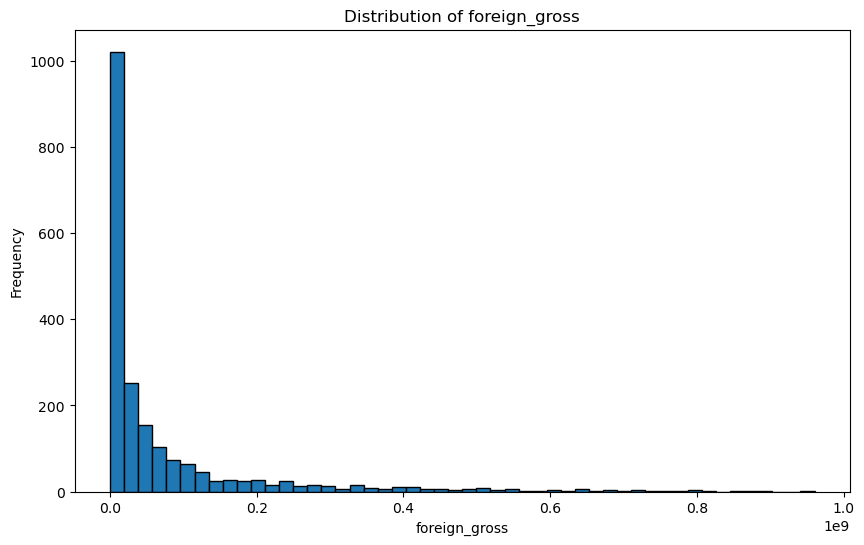

In [19]:
#  Visualize the distribution of 'foreign_gross' using a histogram or boxplot

plt.figure(figsize=(10, 6))
plt.hist(bom_movie_gross_df['foreign_gross'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of foreign_gross')
plt.xlabel('foreign_gross')
plt.ylabel('Frequency')
plt.show()

**Verify Changes:**

In [20]:
# a. Verify Imputation:
bom_movie_gross_df.info()
bom_movie_gross_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2032 non-null   object 
 1   studio          2032 non-null   object 
 2   domestic_gross  2032 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            2032 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.2+ KB


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

**2. Removing Outliers:**

In [21]:
# summary statistics of the 'domestic_gross' column before any changes.
print(bom_movie_gross_df['domestic_gross'].describe())


count    2.032000e+03
mean     4.543655e+07
std      7.587286e+07
min      4.000000e+02
25%      6.912500e+05
50%      1.740000e+07
75%      5.482500e+07
max      7.001000e+08
Name: domestic_gross, dtype: float64


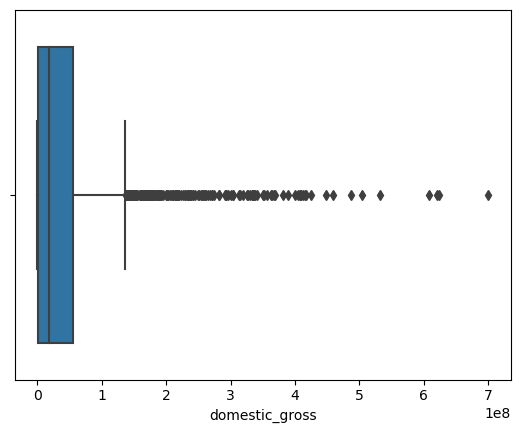

In [22]:
#box plot to visualize the distribution of 'domestic_gross' before handling outliers.
sns.boxplot(x=bom_movie_gross_df['domestic_gross'])
plt.show()


**a. Identify Outliers:**

Use statistical methods such as the IQR (Interquartile Range) to identify potential outliers.

In [23]:
Q1 = bom_movie_gross_df['domestic_gross'].quantile(0.25)
Q3 = bom_movie_gross_df['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bom_movie_gross_df[(bom_movie_gross_df['domestic_gross'] < lower_bound) | (bom_movie_gross_df['domestic_gross'] > upper_bound)]

**b. Remove Outliers:**

In [24]:
bom_movie_gross_df = bom_movie_gross_df[(bom_movie_gross_df['domestic_gross'] >= lower_bound) & (bom_movie_gross_df['domestic_gross'] <= upper_bound)]


**c. Transforming Data:**

In [25]:
bom_movie_gross_df['domestic_gross_log'] = np.log1p(bom_movie_gross_df['domestic_gross'])

**d. Verify Changes**

In [26]:
# summary statistics  after handling outliers.
print(bom_movie_gross_df['domestic_gross'].describe())

count    1.852000e+03
mean     2.622839e+07
std      3.274173e+07
min      4.000000e+02
25%      5.310000e+05
50%      1.195000e+07
75%      4.240000e+07
max      1.360000e+08
Name: domestic_gross, dtype: float64


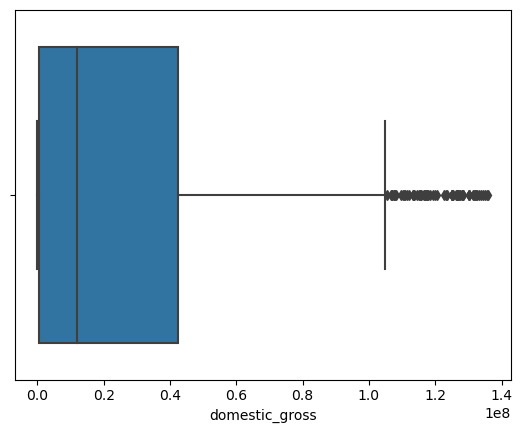

In [27]:
#boxplot to visualize the distribution of 'domestic_gross' AFTER handling outliers.
sns.boxplot(x=bom_movie_gross_df['domestic_gross'])
plt.show()

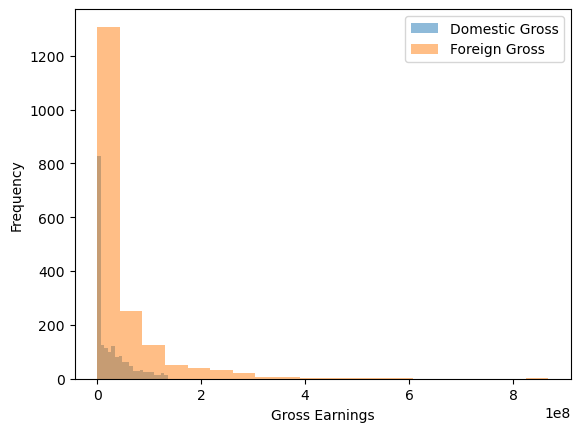

In [28]:
#histograms to visualize the distribution of 'domestic_gross' and 'foreign_gross'.

plt.hist(bom_movie_gross_df['domestic_gross'], bins=20, alpha=0.5, label='Domestic Gross')
plt.hist(bom_movie_gross_df['foreign_gross'].dropna(), bins=20, alpha=0.5, label='Foreign Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Studio Performance:**

*a.Count of Movies per Studio:*

Explore the number of movies produced by each studio.

In [29]:
# Count the number of unique studios
unique_studios = bom_movie_gross_df['studio'].nunique()

# Print the number of unique studios
print("Number of unique studios:", unique_studios)

# Calculate the count/frequency of each studio
studio_counts = bom_movie_gross_df['studio'].value_counts()

# Print the count/frequency of each studio
print("Movie count per studio:\n", studio_counts)


Number of unique studios: 175
Movie count per studio:
 Uni.            117
Fox             109
WB              101
Sony             88
LGF              84
               ... 
Icar.             1
MPFT              1
KC                1
Libre             1
Darin Southa      1
Name: studio, Length: 175, dtype: int64


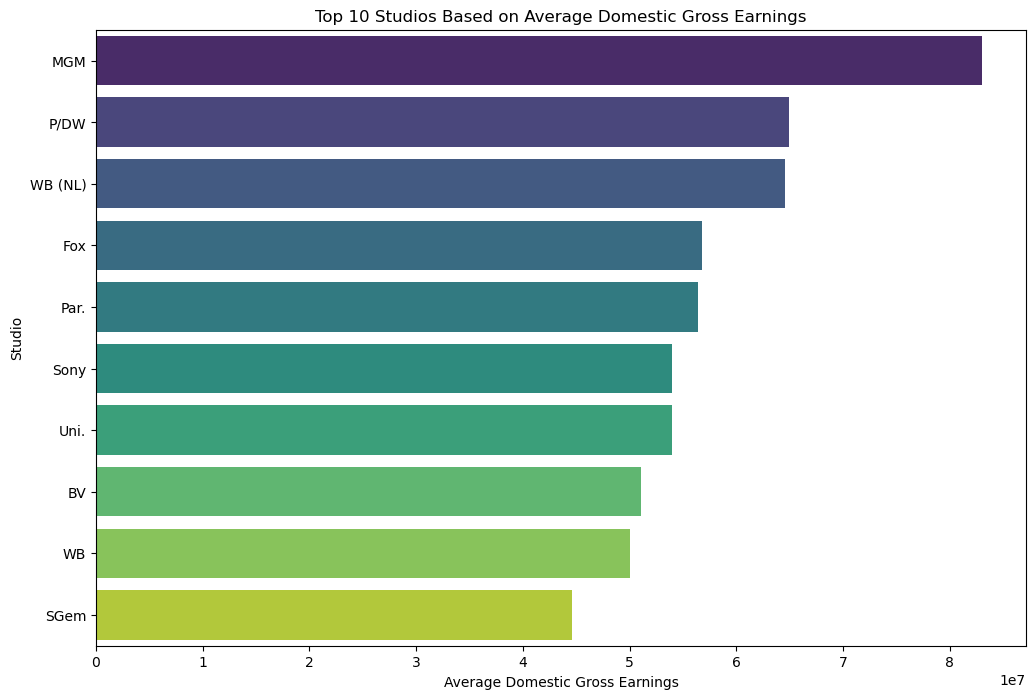

In [30]:

# Top N studios (adjust N as needed)
top_studios = 10
studio_performance = bom_movie_gross_df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False).head(top_studios)

# Plotting Horizontal Bar Chart for Top Studios
plt.figure(figsize=(12, 8))
sns.barplot(x=studio_performance.values, y=studio_performance.index, palette='viridis')
plt.xlabel('Average Domestic Gross Earnings')
plt.ylabel('Studio')
plt.title(f'Top {top_studios} Studios Based on Average Domestic Gross Earnings')
plt.show()


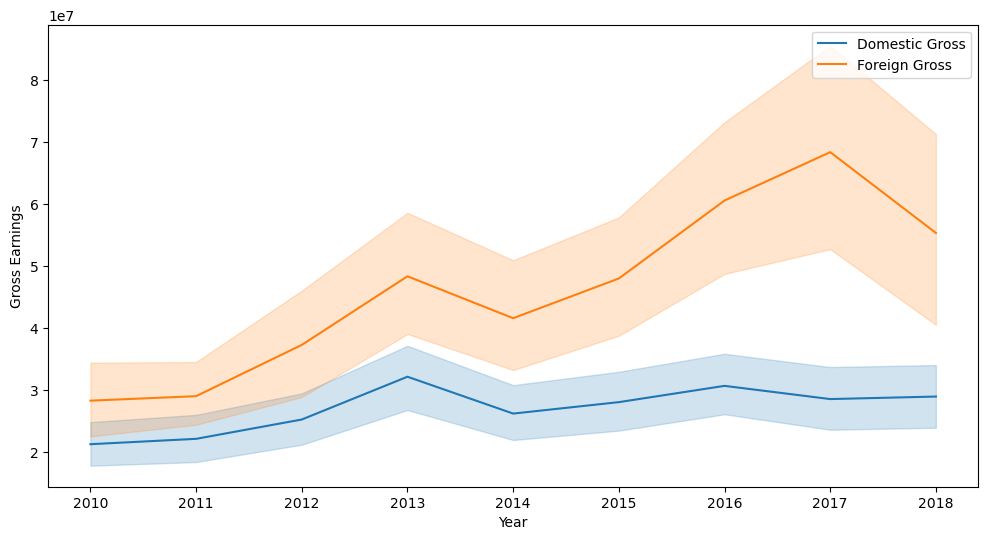

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=bom_movie_gross_df['year'], y=bom_movie_gross_df['domestic_gross'], label='Domestic Gross')
sns.lineplot(x=bom_movie_gross_df['year'], y=bom_movie_gross_df['foreign_gross'], label='Foreign Gross')
plt.xlabel('Year')
plt.ylabel('Gross Earnings')
plt.legend()
plt.show()


*b. Heatmap:*

A heatmap to visualize the correlation between 'domestic_gross' and 'foreign_gross' over the years.

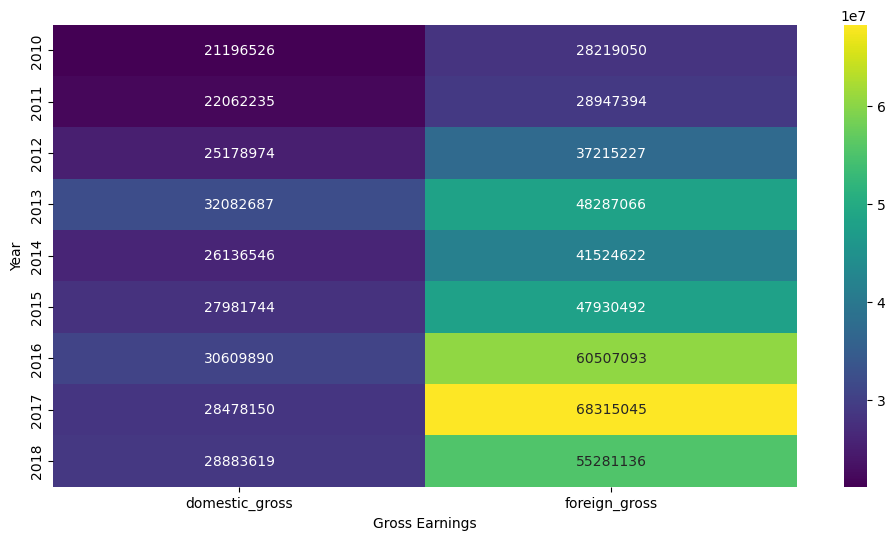

In [32]:
plt.figure(figsize=(12, 6))
pivot_table = bom_movie_gross_df.pivot_table(values=['domestic_gross', 'foreign_gross'], index='year', aggfunc='mean')
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.0f')
plt.xlabel('Gross Earnings')
plt.ylabel('Year')
plt.show()

**Summary Statistics:**

Display summary statistics for key variables to provide a numerical overview of the dataset.

In [33]:
print(bom_movie_gross_df[['domestic_gross', 'foreign_gross']].describe())


       domestic_gross  foreign_gross
count    1.852000e+03   1.852000e+03
mean     2.622839e+07   4.340357e+07
std      3.274173e+07   7.103683e+07
min      4.000000e+02   6.000000e+02
25%      5.310000e+05   3.100000e+06
50%      1.195000e+07   1.510000e+07
75%      4.240000e+07   5.245000e+07
max      1.360000e+08   8.676000e+08


**Correlation Analysis:**

A correlation analysis to understand the relationship between numerical variables.

In [34]:
correlation_matrix = bom_movie_gross_df[['domestic_gross', 'foreign_gross']].corr()
print(correlation_matrix)


                domestic_gross  foreign_gross
domestic_gross        1.000000       0.549392
foreign_gross         0.549392       1.000000


The correlation matrix indicates a moderate positive correlation (0.549392) between "domestic_gross" and "foreign_gross." This suggests that movies with higher domestic gross tend to also have higher foreign gross, and vice versa. The positive correlation implies that as one variable increases, the other variable tends to increase as well, indicating a positive association between the two.

**4. Feature Engineering:**

*Combined 'Total Gross' Column:*

Combine domestic and foreign gross earnings to create a new feature representing the total gross earnings of a movie.

In [35]:
# Assuming 'domestic_gross' and 'foreign_gross' are numeric columns
bom_movie_gross_df['total_gross'] = bom_movie_gross_df['domestic_gross'] + bom_movie_gross_df['foreign_gross'].fillna(0)

# Display the updated DataFrame
print(bom_movie_gross_df.head())


                                                title studio  domestic_gross  \
11  The Chronicles of Narnia: The Voyage of the Da...    Fox     104400000.0   
12                                  The King's Speech  Wein.     135500000.0   
15                Prince of Persia: The Sands of Time     BV      90800000.0   
16                                         Black Swan   FoxS     107000000.0   
18                                         Robin Hood   Uni.     105300000.0   

    foreign_gross  year  domestic_gross_log  total_gross  
11    311300000.0  2010           18.463740  415700000.0  
12    275400000.0  2010           18.724482  410900000.0  
15    245600000.0  2010           18.324170  336400000.0  
16    222400000.0  2010           18.488339  329400000.0  
18    216400000.0  2010           18.472324  321700000.0  


**Categorical Variable for Movie Success Levels:**

Create a categorical variable that indicates different levels of movie success based on a threshold.Categorize movies into 'Low,' 'Medium,' and 'High' success levels.

In [38]:
# Define a success threshold (you can adjust this based on your criteria)
success_threshold = 100000000  # $100 million

# Create a categorical variable based on success levels
bom_movie_gross_df['success_level'] = pd.cut(bom_movie_gross_df['total_gross'],
                                             bins=[-float('inf'), success_threshold, 2*success_threshold, float('inf')],
                                             labels=['Low', 'Medium', 'High'],
                                             include_lowest=True)

# Display the updated DataFrame
print(bom_movie_gross_df.head())


                                                title studio  domestic_gross  \
11  The Chronicles of Narnia: The Voyage of the Da...    Fox     104400000.0   
12                                  The King's Speech  Wein.     135500000.0   
15                Prince of Persia: The Sands of Time     BV      90800000.0   
16                                         Black Swan   FoxS     107000000.0   
18                                         Robin Hood   Uni.     105300000.0   

    foreign_gross  year  domestic_gross_log  total_gross success_level  
11    311300000.0  2010           18.463740  415700000.0          High  
12    275400000.0  2010           18.724482  410900000.0          High  
15    245600000.0  2010           18.324170  336400000.0          High  
16    222400000.0  2010           18.488339  329400000.0          High  
18    216400000.0  2010           18.472324  321700000.0          High  


**Verify Changes:**

After performing feature engineering, verify the changes in the dataset.

In [39]:
# Verify changes in the DataFrame
print(bom_movie_gross_df[['total_gross', 'success_level']].describe())


        total_gross
count  1.852000e+03
mean   6.963195e+07
std    9.313365e+07
min    4.900000e+03
25%    6.818000e+06
50%    3.320000e+07
75%    9.500000e+07
max    8.703000e+08


**Utilizing The New Features in Analysis:**

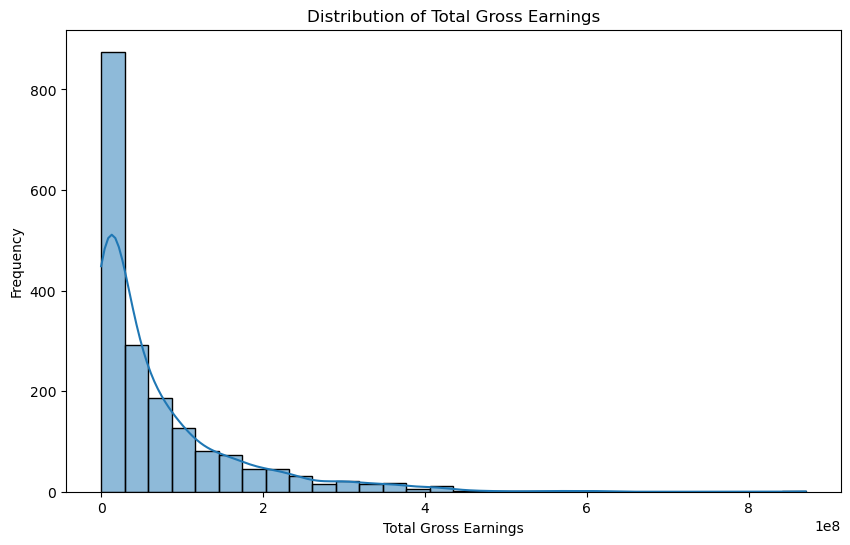

In [40]:
# Example: Visualize the distribution of 'total_gross'
plt.figure(figsize=(10, 6))
sns.histplot(bom_movie_gross_df['total_gross'], bins=30, kde=True)
plt.xlabel('Total Gross Earnings')
plt.ylabel('Frequency')
plt.title('Distribution of Total Gross Earnings')
plt.show()

*Trend Analysis Over Time:*

Explore how the total gross earnings or success levels have changed over the years. This can help identify trends and patterns.

In [42]:
bom_movie_gross_df.head(2)

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_log,total_gross,success_level
11,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000.0,2010,18.463740,415700000.0,High
12,The King's Speech,Wein.,135500000.0,275400000.0,2010,18.724482,410900000.0,High


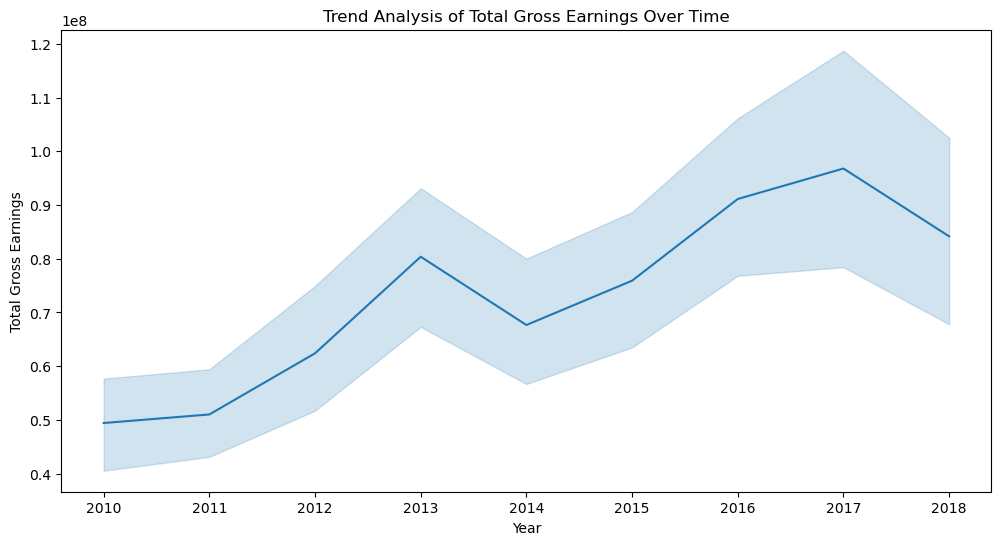

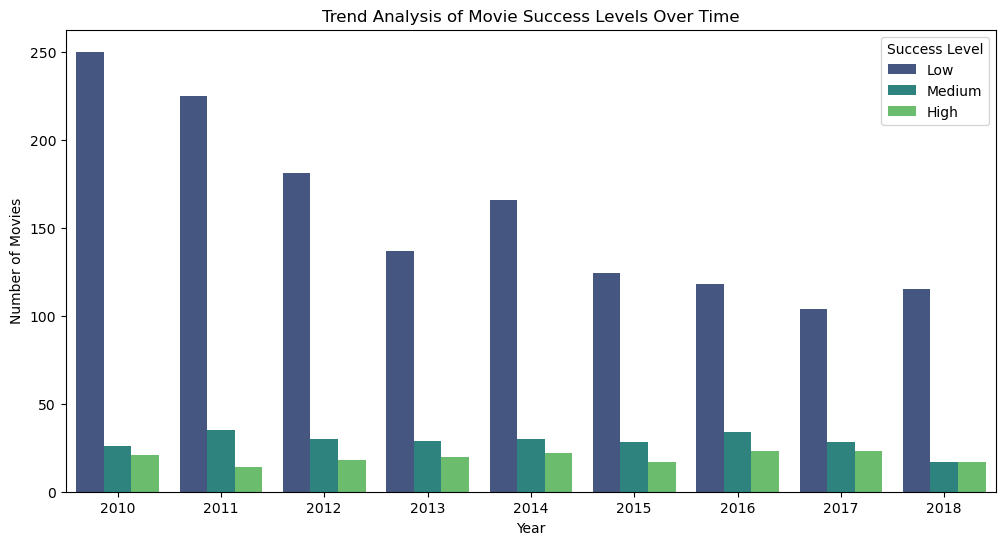

In [43]:
#Trend analysis of total gross earnings over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=bom_movie_gross_df['year'], y=bom_movie_gross_df['total_gross'])
plt.xlabel('Year')
plt.ylabel('Total Gross Earnings')
plt.title('Trend Analysis of Total Gross Earnings Over Time')
plt.show()

# Trend analysis of success levels over the years
plt.figure(figsize=(12, 6))
sns.countplot(x=bom_movie_gross_df['year'], hue=bom_movie_gross_df['success_level'], palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Trend Analysis of Movie Success Levels Over Time')
plt.legend(title='Success Level')
plt.show()
